# Iris

## Libraries

In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.tree import DecisionTreeClassifier,plot_tree
import matplotlib.pyplot as plt

## Load iris Data set


In [2]:
matrix_iris=load_iris()
df_iris=pd.DataFrame(data=matrix_iris.data,columns=matrix_iris.feature_names)
df_iris["target"]=matrix_iris.target
df_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [3]:
X=df_iris.iloc[:,:4]
y=df_iris['target']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Preprocessing

### Pairplot

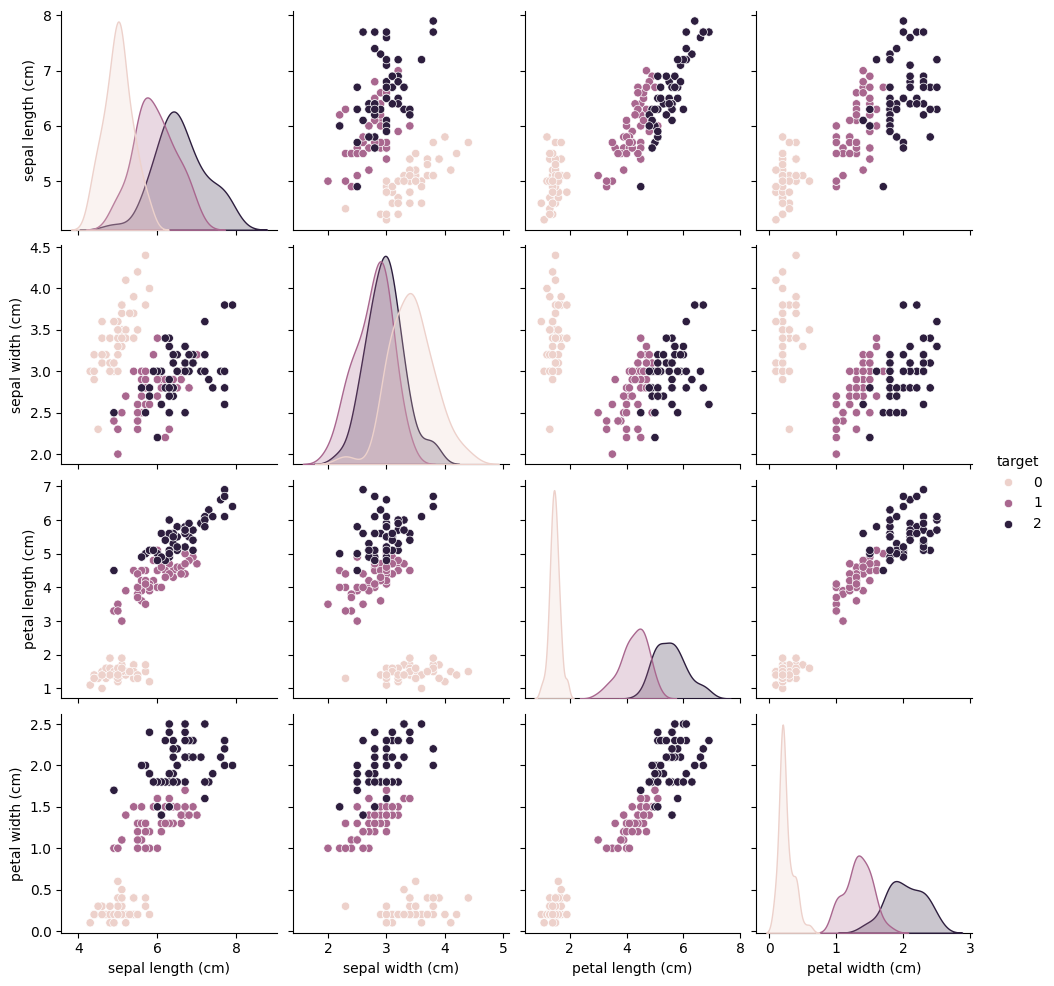

In [5]:
sns.pairplot(df_iris,hue='target')

### Feature Importance

In [6]:
decision_tree=DecisionTreeClassifier(random_state=42)

In [7]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [8]:
grid_search = GridSearchCV(
    estimator=decision_tree,
    param_grid=param_grid,
    cv=5,  
    scoring='accuracy',
    n_jobs=-1,  
    verbose=1
)

In [9]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


,estimator,DecisionTreeC...ndom_state=42)
,param_grid,"{'criterion': ['gini', 'entropy'], 'max_depth': [3, 5, ...], 'min_samples_leaf': [1, 2, ...], 'min_samples_split': [2, 5, ...]}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'entropy'


In [10]:
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Score: {grid_search.best_score_:.4f}")

Best Parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best Score: 0.9583


In [11]:
decision_tree=DecisionTreeClassifier(criterion='entropy',max_depth=5,min_samples_leaf=4,min_samples_split=2)
decision_tree.fit(X,y)

,criterion,'entropy'
,splitter,'best'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,4
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


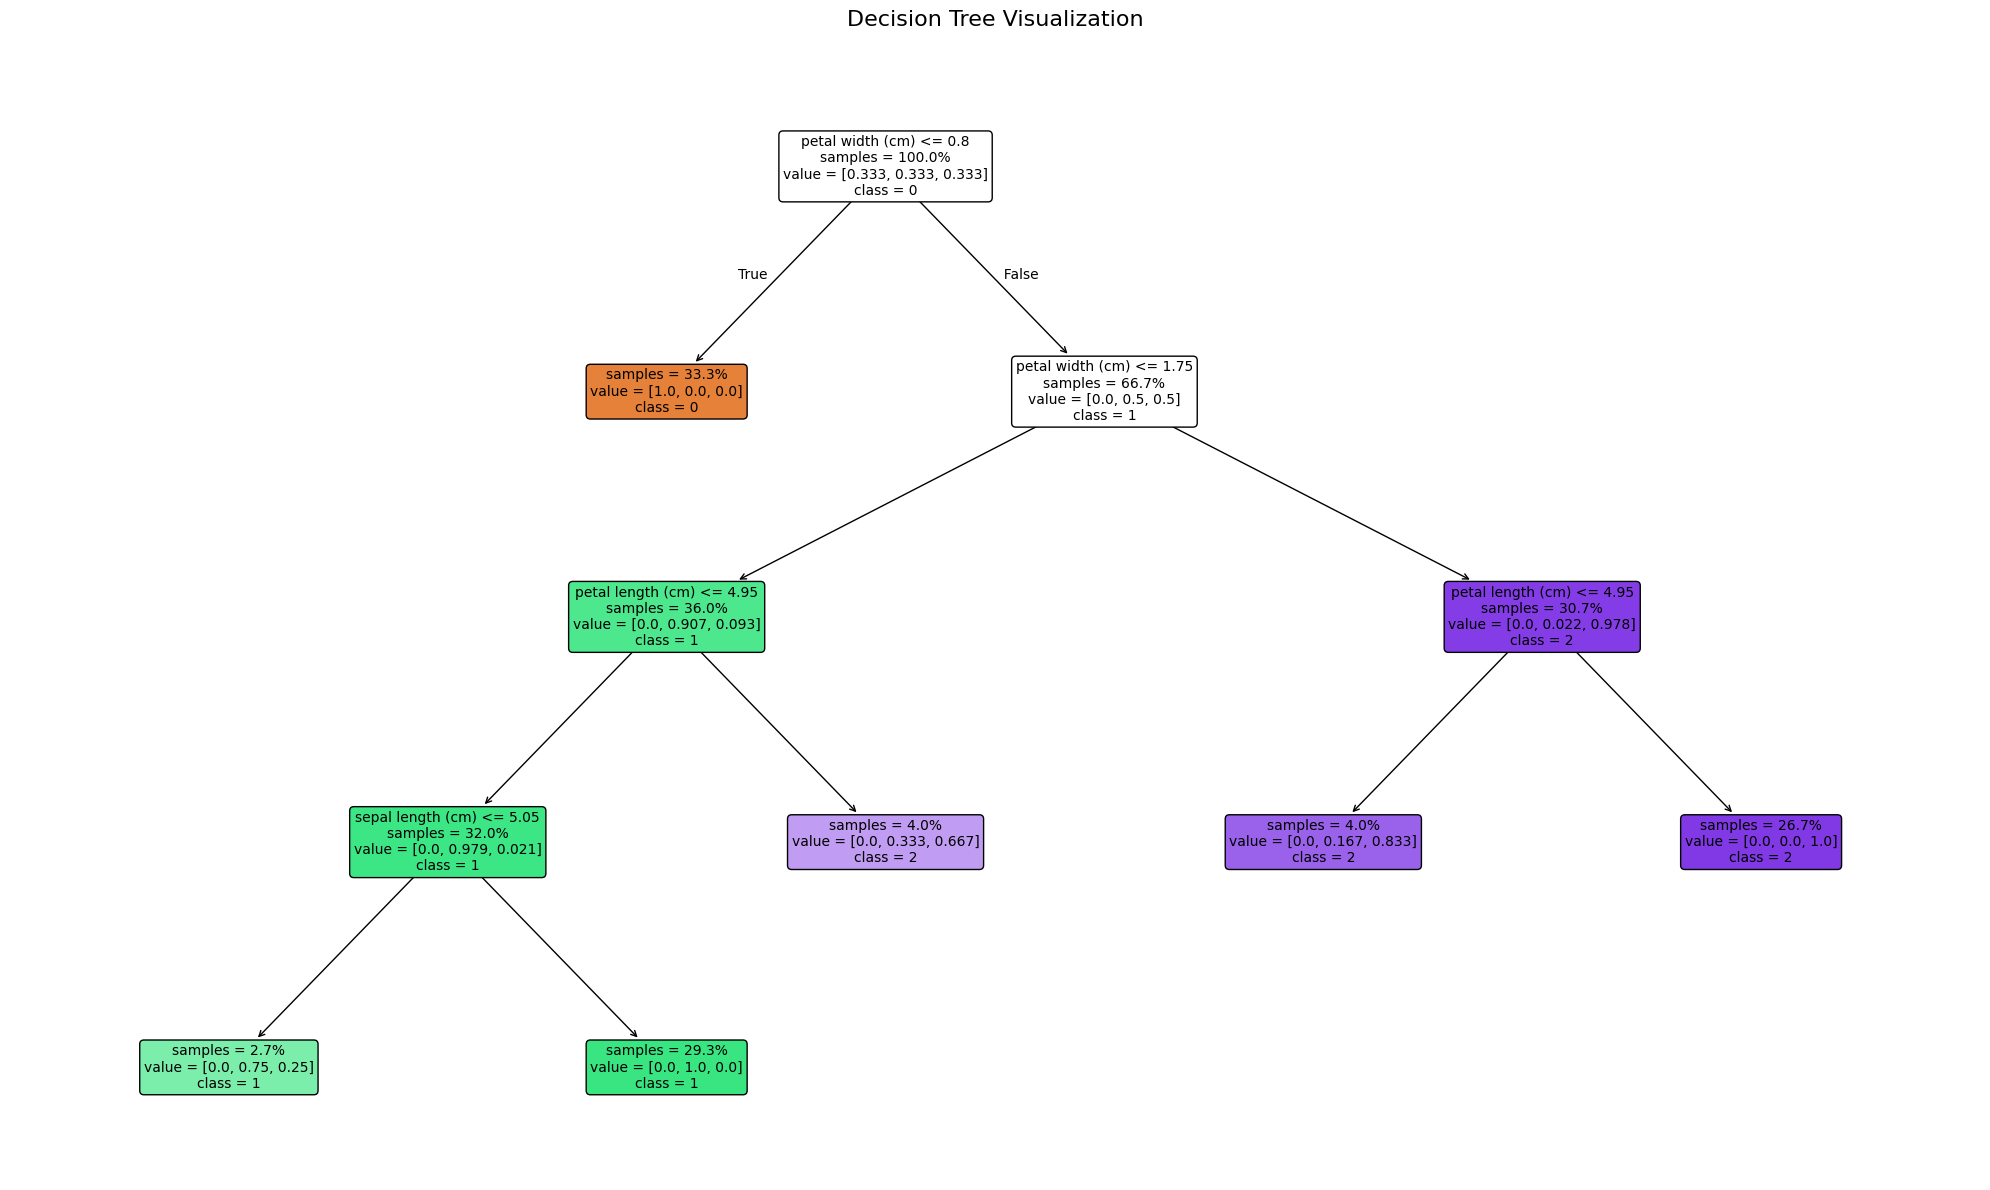

In [12]:
plt.figure(figsize=(20, 12))
plot_tree(
    decision_tree=decision_tree,  
    feature_names=X.columns,  
    class_names=[str(label) for label in np.unique(y)],  
    filled=True,  
    rounded=True,  
    fontsize=10,
    proportion=True,  
    impurity=False 
)

plt.title("Decision Tree Visualization", fontsize=16, pad=20)
plt.tight_layout()

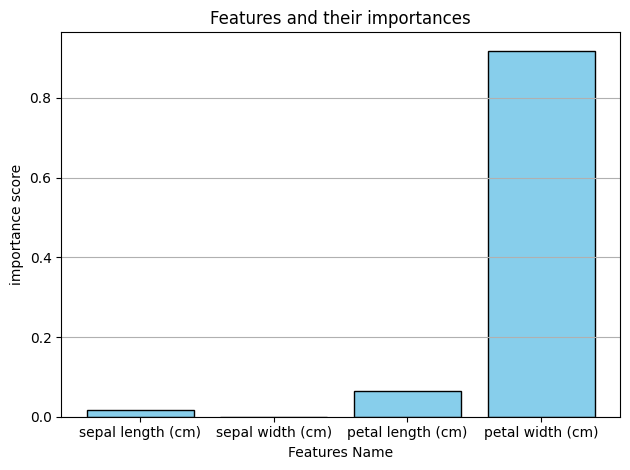

In [13]:
plt.bar(decision_tree.feature_names_in_,decision_tree.feature_importances_,color='skyblue', edgecolor='black')
plt.xlabel("Features Name")
plt.ylabel("importance score")
plt.title("Features and their importances")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

### Feature Weighting

In [17]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [20]:
weights = decision_tree.feature_importances_
weights = weights / weights.mean()
print(f"Normalized Weights : {list(zip(decision_tree.feature_names_in_,map(float,weights)))}")

Normalized Weights : [('sepal length (cm)', 0.06694961723322318), ('sepal width (cm)', 0.0), ('petal length (cm)', 0.2587688699718205), ('petal width (cm)', 3.6742815127949564)]


In [21]:
X_train_scaled_weighted=X_train_scaled*weights

In [22]:
X_test_scaled_weighted=X_test_scaled*weights

## Model selection


### Model Training

In [23]:
knn=KNeighborsClassifier()

In [ ]:
param_grid_knn = {
    "n_neighbors": range(3, 21, 2),
    "weights": ["uniform", "distance"],
    "metric": ["euclidean", "manhattan"]
}

In [25]:
grid = GridSearchCV(
    knn,
    param_grid,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)

In [26]:
grid.fit(X_train_scaled_weighted, y_train)

,estimator,KNeighborsClassifier()
,param_grid,"{'metric': ['euclidean', 'manhattan'], 'n_neighbors': range(3, 21, 2), 'weights': ['uniform', 'distance']}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_neighbors,9


In [27]:
print("Best params:", grid.best_params_)
print("Best score:", grid.best_score_)

Best params: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}
Best score: 0.95


In [28]:
knn=KNeighborsClassifier(metric='euclidean',n_neighbors=9,weights='uniform')
knn.fit(X_train_scaled_weighted,y_train)

,n_neighbors,9
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'euclidean'
,metric_params,None
,n_jobs,None


In [29]:
y_pred=knn.predict(X_test_scaled_weighted)

### Model Evaluation

In [33]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



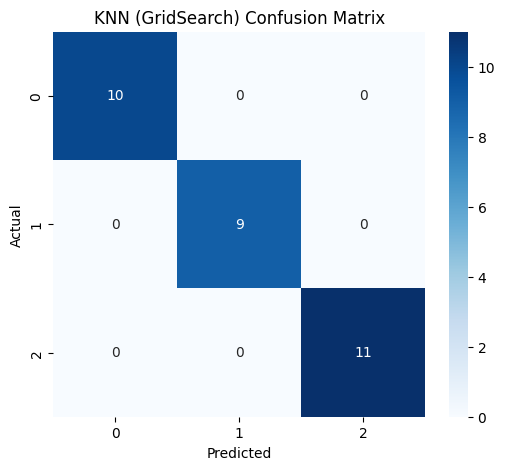

In [30]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues'
)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('KNN (GridSearch) Confusion Matrix')
plt.show()